
- 0205에 전처리한 데이터 셋 사용 - p_train ,p_test
- oversampling 시행
- 토큰 방법 Mecab말고 Okt 사용
  https://github.com/open-korean-text/open-korean-text

Okt : 오픈 소스 한국어 분석기, 과거에 트위터라고 불림


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import sklearn as sk

In [ ]:
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
train      = pd.read_csv("p_train.csv")
test       = pd.read_csv("p_test.csv")

train = train.drop(columns=["Unnamed: 0","index"])
test = test.drop(columns=["Unnamed: 0","index"])

In [ ]:
train

,title,topic_idx
0,인천에서핀란드 항공기 결항 휴가철 여행객 분통,4
1,실리콘밸리 넘어서겠다 구글 15조원 들여 미국전역 거점화,4
2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4
3,NYT 클린턴 측근한국기업 특수관계 조명 공과 사 맞물려,4
4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4
...,...,...
45649,KB금융 미국 IB 스티펠과 제휴 선진국 시장 공략,1
45650,서울교육청 신종코로나 확산에 개학 연기 휴업 검토,2
45651,키움증권 2020 키움 영웅전 실전투자대회,1
45652,답변하는 배기동 국립중앙박물관장,2


In [ ]:
test

,title
0,유튜브 내달 2일까지 크리에이터 지원 공간 운영
1,어버이날 맑다가 흐려져 남부지방 옅은 황사
2,내년부터 국가RD 평가 때 논문건수는 반영 않는다
3,김명자 신임 과총 회장 원로와 젊은 과학자 지혜 모을 것
4,회색인간 작가 김동식 양심고백 등 새 소설집 2권 출간
...,...
9126,인천 오후 3시35분 대설주의보 눈 3.1CM 쌓여
9127,노래방에서 지인 성추행 외교부 사무관 불구속 입건
9128,40년 전 부마항쟁 부산 시위 사진 2점 최초 공개
9129,아리랑TV 아프리카개발은행 총회 개회식 생중계


# oversampling

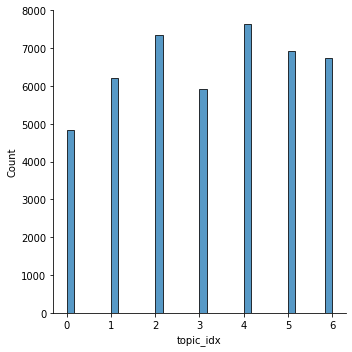

In [ ]:
sns.displot(train.topic_idx)

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
# SMOTE : 오버샘플링
titles_t = train.title.to_numpy().reshape(-1, 1)
labels_t = train.topic_idx.to_numpy().reshape(-1, 1)
oversample = RandomOverSampler()
X_oversample, y_oversample = oversample.fit_resample(titles_t, labels_t)
train = pd.DataFrame({"title": X_oversample.reshape(-1), 'topic_idx': y_oversample.reshape(-1)})

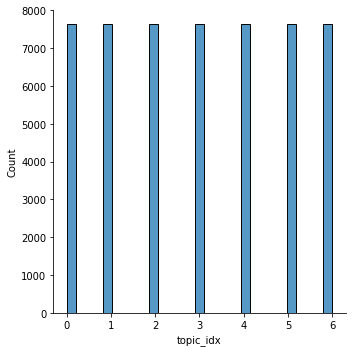

In [ ]:
# SMOTE로 클래스별 비율 맞춰준 후 distplot
sns.displot(train.topic_idx)

In [ ]:
train.groupby(by=["topic_idx"]).count()

,title
topic_idx,
0,7578
1,7618
2,7605
3,7463
4,7628
5,7622
6,7616


# konlpy - okt 사용
https://pinggoopark.tistory.com/107

In [ ]:
# bash 셸로 명령어 입력하여 라이브러리 설치하기

%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy

Get:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu2004/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu focal InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu2004/x86_64  Release
Get:6 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:7 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Hit:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Get:9 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Get:13 http://archive.ubuntu.com/ubuntu focal-updates/restricted amd64 Packages [2,050 kB]
Hit:14 http://ppa.launchpad.net/graphi

In [ ]:
# JAVA_HOME 환경변수 설정하기

%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

env: JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"


In [ ]:
# okt 사용해보기 from konlpy

import konlpy
import re
from konlpy.tag import Okt

In [ ]:
# tokenization 함수 생성
def tokenize_korean_text(text):
  okt = konlpy.tag.Okt()
  # okt.pos() : 각 단어의 품사를 태깅 
  Okt_morphs = okt.pos(text, stem=True)  # stem=True : 동사원형으로 바꿔서 return

  words = []
  for word, pos in Okt_morphs:
    if pos == "Adjecvie" or pos == "Verb" or pos == "Noun": 
      words.append(word)

  words_str = ' '.join(words)
  return words_str

In [ ]:
# train의 title 컬럼을 하나씩 tokenize해서 list로 저장
tokenized_list = []

for text in train["title"]:
  tokenized_list.append(tokenize_korean_text(text))

In [ ]:
# 단어가 1-2개만 포함된 corpus는 삭제
drop_corpus = []

for index in range(len(tokenized_list)):
  corpus = tokenized_list[index]
  if len(set(corpus.split())) < 3: # 같은 단어 1-2개만 반복되는 corpus도 지우기 위해 set 씀 (중복 제거)
    train.drop(index, axis='index', inplace=True)
    drop_corpus.append(corpus)

for corpus in drop_corpus:
  tokenized_list.remove(corpus)

train.reset_index(drop=True, inplace=True)

In [ ]:
train

,title,topic_idx
0,인천에서핀란드 항공기 결항 휴가철 여행객 분통,4
1,실리콘밸리 넘어서겠다 구글 15조원 들여 미국전역 거점화,4
2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4
3,NYT 클린턴 측근한국기업 특수관계 조명 공과 사 맞물려,4
4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4
...,...,...
53125,바른미래당 공천관리위원장에 목진휴 국민대 명예교수,6
53126,여야 법사위서 박근혜대통령 국회법 거부권 놓고 격돌,6
53127,문 대통령 스포츠가 정치 이념 장벽 뛰어넘는 것 보여줄 것,6
53128,선관위 새누리당 총선홍보 총괄 조동원 등 고발,6


# BERT Fine-tuning
https://velog.io/@jaehyeong/Fine-tuning-Bert-using-Transformers-and-TensorFlow

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer

import torch
from torch.utils.data import Dataset, DataLoader

In [ ]:
train

,title,topic_idx
0,인천에서핀란드 항공기 결항 휴가철 여행객 분통,4
1,실리콘밸리 넘어서겠다 구글 15조원 들여 미국전역 거점화,4
2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4
3,NYT 클린턴 측근한국기업 특수관계 조명 공과 사 맞물려,4
4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4
...,...,...
53125,바른미래당 공천관리위원장에 목진휴 국민대 명예교수,6
53126,여야 법사위서 박근혜대통령 국회법 거부권 놓고 격돌,6
53127,문 대통령 스포츠가 정치 이념 장벽 뛰어넘는 것 보여줄 것,6
53128,선관위 새누리당 총선홍보 총괄 조동원 등 고발,6


In [ ]:
# 텍스트와 라벨 따로 분리
train_texts = train["title"].to_list() # Features (not-tokenized yet)
train_labels = train["topic_idx"].to_list() # Labels

In [ ]:
# 모델 검증을 위해 분리
from sklearn.model_selection import train_test_split

# Split Train and Validation data
train_texts, val_texts, train_labels, val_labels = train_test_split(train_texts, train_labels, test_size=0.2, random_state=0)

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 33.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 67.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 21.2 MB/s eta 0:00:00


In [ ]:
# HuggingFace의 Transformers라이브러리를 활용
# Transformers를 통해 저장된 모델은 기본적으로 pretrained model, tokenizer, vocab, config 파일 등을 포함하고 있으며, from_pretrained() 메소드를 통해 로드할 수 있다.
from transformers import BertTokenizerFast

#KLUE-BERT Model Path
HUGGINGFACE_MODEL_PATH = "klue/bert-base"

# Load Tokenizer - 토큰화
# BertTokenizerFast() 속도는 빠르지만 성능에 영향을 줄 수 있어 다른 방법 선택 가능
# 파라미터 튜닝 참고 : https://huggingface.co/docs/transformers/main_classes/tokenizer
tokenizer = BertTokenizerFast.from_pretrained(HUGGINGFACE_MODEL_PATH)

In [ ]:
# Tokenizing
train_encodings = tokenizer(train_texts, truncation=True, padding=True)
val_encodings = tokenizer(val_texts, truncation=True, padding=True)

In [ ]:
# fine-tuning을 진행하기 전에 먼저 tokenized 된 데이터 셋을 Tensorflow의 Dataset object로 변환을 위해 from_tensor_slices()메서드를 수행
import tensorflow as tf

# trainset-set
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    train_labels
))

# validation-set
val_dataset = tf.data.Dataset.from_tensor_slices((
    dict(val_encodings),
    val_labels
))

### fine-tuning BERT 
tensorflow 적용

In [ ]:
from transformers import TFBertForSequenceClassification

num_labels = 7
model = TFBertForSequenceClassification.from_pretrained(HUGGINGFACE_MODEL_PATH, num_labels=num_labels, from_pt=True)

optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)
model.compile(optimizer=optimizer, loss=model.compute_loss, metrics=['accuracy'])

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertForSequenceClassification: ['bert.embeddings.position_ids']
- This IS expected if you are initializing TFBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

callback_earlystop = EarlyStopping(
    monitor="val_accuracy", 
    min_delta=0.001, # the threshold that triggers the termination (acc should at least improve 0.001)
    patience=2)

In [ ]:
model.fit(
    train_dataset.shuffle(1000).batch(16), epochs=5, batch_size=16,
    validation_data = val_dataset.shuffle(1000).batch(16),
    callbacks = [callback_earlystop]
)

Epoch 1/5


AttributeError: ignored

In [ ]:
train_dataset.shuffle(1000)

<ShuffleDataset element_spec=({'input_ids': TensorSpec(shape=(27,), dtype=tf.int32, name=None), 'token_type_ids': TensorSpec(shape=(27,), dtype=tf.int32, name=None), 'attention_mask': TensorSpec(shape=(27,), dtype=tf.int32, name=None)}, TensorSpec(shape=(), dtype=tf.int32, name=None))>

# 다른 코드로 적용
https://dacon.io/competitions/official/235747/codeshare/3047?page=2&dtype=recent

In [ ]:
model_checkpoint = "klue/bert-base"
batch_size = 32
task = "nli"
RANDOM_SEED = 17

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint, use_fast=True)

In [ ]:
dataset = train

In [ ]:
dataset_train, dataset_val = train_test_split(dataset,test_size = 0.2,random_state = RANDOM_SEED)

In [ ]:
class BERTDataset(Dataset):
    def __init__(self, dataset, sent_key, label_key, bert_tokenizer):
        
        self.sentences = [ bert_tokenizer(i,truncation=True,return_token_type_ids=False) for i in dataset[sent_key] ]
        
        if not label_key == None:
            self.mode = "train"
        else:
            self.mode = "test"
            
        if self.mode == "train":
            self.labels = [np.int64(i) for i in dataset[label_key]]
        else:
            self.labels = [np.int64(0) for i in dataset[sent_key]]

    def __getitem__(self, i):
        if self.mode == "train":
            self.sentences[i]["label"] = self.labels[i]
            return self.sentences[i]

        else:
            return self.sentences[i]

    def __len__(self):
        return (len(self.labels))

In [ ]:
data_train = BERTDataset(dataset_train, "title", "topic_idx", tokenizer)
data_val = BERTDataset(dataset_val, "title", "topic_idx", tokenizer)
data_test = BERTDataset(test, "title", None, tokenizer)

In [ ]:
num_labels = 7
model = AutoModelForSequenceClassification.from_pretrained(model_checkpoint, num_labels=num_labels)

Some weights of the model checkpoint at klue/bert-base were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized

In [ ]:
metric = load_metric("glue", "qnli")

NameError: ignored

In [ ]:
def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return metric.compute(predictions=predictions, references=labels)

In [ ]:
metric_name = "accuracy"

args = TrainingArguments(
    "test-nli",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=3,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model=metric_name,
)